<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/clustered_design_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the NSGA2 (with clustered initial population) to solve the same problem as given in the paper.


In [2]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination
from pymoo.optimize import minimize
from sklearn.datasets import make_blobs

The paper states 3 structural design problems. 

Problem 1:  
**Design of pressure vessel. (Section 4.2.1).**


---


Objective functions:  
```
Minimize f(X) = 0.6224*x1*x3*x4 + 1.7781*x2*x3^2+ 3.1661*x1^2*x4 + 19.84*x1^2*x3

Such that:
g1(X) = −x1 + 0.0193*x3 <= 0
g2(X) = −x2 + 0.00954*x3 <= 0
g3(X) = − pi*x3^2*x4 − 4/3 *pi*x3^3 + 1296000 <= 0
g4(X) = x4 − 240 <= 0

Bounds:
0.0625 <= x1, x2 <= 99*0.0625 
10 <= x3, x4 <= 200
```

> There are four design variable associated with it namely
as thickness of the pressure vessel, Ts = x1, thickness of the head, Th = x2, inner radius of the vessel, R = x3, and length of the vessel without heads, L = x4 i.e. the variables vectors are given (in inches) by X = (Ts, Th,R,L) = (x1, x2, x3, x4).
 



In [3]:
import math

pi = math.pi

#objective functions
objs = [
    lambda x: 0.6224 * x[0]*x[2]*x[3] + 1.7781 * x[1]*x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84*x[0]**2 * x[2],
]

# Contraint equations
constr_ieq = [
    lambda x: - x[0] + 0.0193*x[2],
    lambda x: - x[1] + 0.00954*x[2],
    lambda x: - pi*x[2]**2*x[3] - 4/3 *pi*x[2]**3 + 1296000,
    lambda x: x[3] - 240
]

# value bounds
lower_bound = np.array([0.0625, 0.0625, 10, 10])
upper_bound = np.array([99*0.0625, 99*0.0625, 200, 200])

# initialising problem
problem = FunctionalProblem(4, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)


Instead of starting out with a randomly generated population as we usually do, I will be generating clusters of populations, i.e. the population will be clustered into groups instead of being scattered throughout the solution space.

**Reason**: Comparison of algo/solution quality with that when population is randomly scattered.

In [4]:
# Generating 30 clusters:
X, y = make_blobs(n_samples=300, centers=30, n_features=4, random_state=0)

Initialising the NSGA2 Algo and termination condition:

In [5]:
algorithm = NSGA2(
    pop_size= 100,     # Since there are already 100 in each population (above), pop_size can be put to as low as 10
    n_offsprings=25,
    sampling = X,
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 280)

In [ ]:
ans = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

In [7]:
print("X: ", ans.X)
print("Obj: ", ans.F)
print("Constraints: ", ans.G)

X:  [ 1.26053419  0.62266784 65.2534362  10.00000293]
Obj:  [7333.6763316]
Constraints:  [0. 0. 0. 0.]


In [8]:
ans.exec_time

2.677523374557495

**Observations**

The solution obtained from clustering is much worse than that obtained without clustering (`5986.69`) as well as that given in the paper using ABC (`5885.40`). 

Tuning of the population size, number of clusters, etc. may give better results. 

Covergence:



```
x-axis: number of function evaluations
y-axis: optimum objective value
```


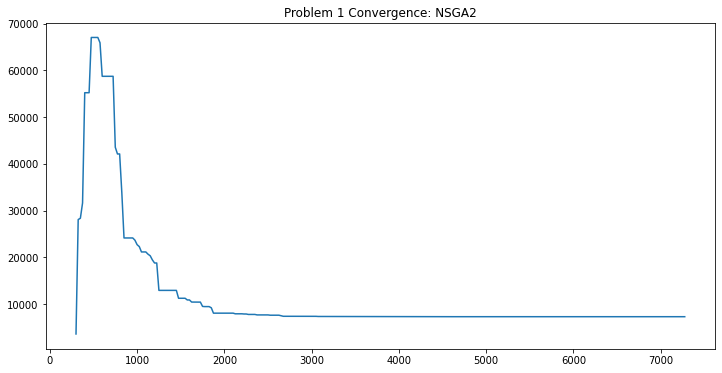

In [10]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.show()

Convergence with logarithmic scale Y-Axis

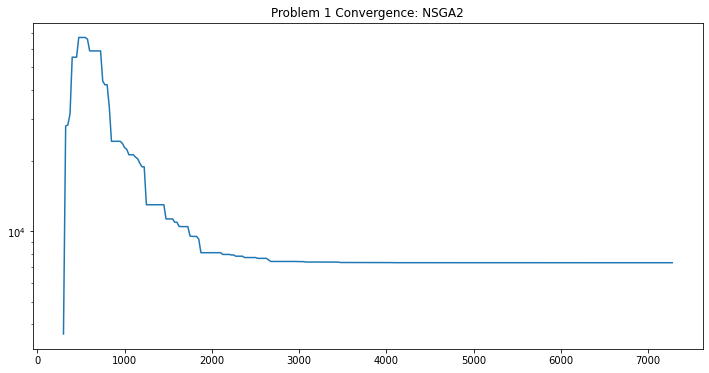

In [11]:
n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()